## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [5]:
import pandas as pd
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [8]:
import csv

def calculate_survival_rate(filename):
    male_survived = 0
    male_total = 0
    female_survived = 0
    female_total = 0
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Sex'] == 'male':
                male_total += 1
                if row['Survived'] == '1':
                    male_survived += 1
            elif row['Sex'] == 'female':
                female_total += 1
                if row['Survived'] == '1':
                    female_survived += 1





    if male_total > 0:
        male_survival_rate = (male_survived / male_total) * 100
        print(f"Відсоток виживання серед чоловіків: {male_survival_rate:.2f}%")

    if female_total > 0:
        female_survival_rate = (female_survived / female_total) * 100
        print(f"Відсоток виживання серед жінок: {female_survival_rate:.2f}%")
   
        
        
        
        

filename = 'titanic.csv'  
calculate_survival_rate(filename)



Відсоток виживання серед чоловіків: 18.89%
Відсоток виживання серед жінок: 74.20%


**Задача 2:** Відтворіть ці графіки  
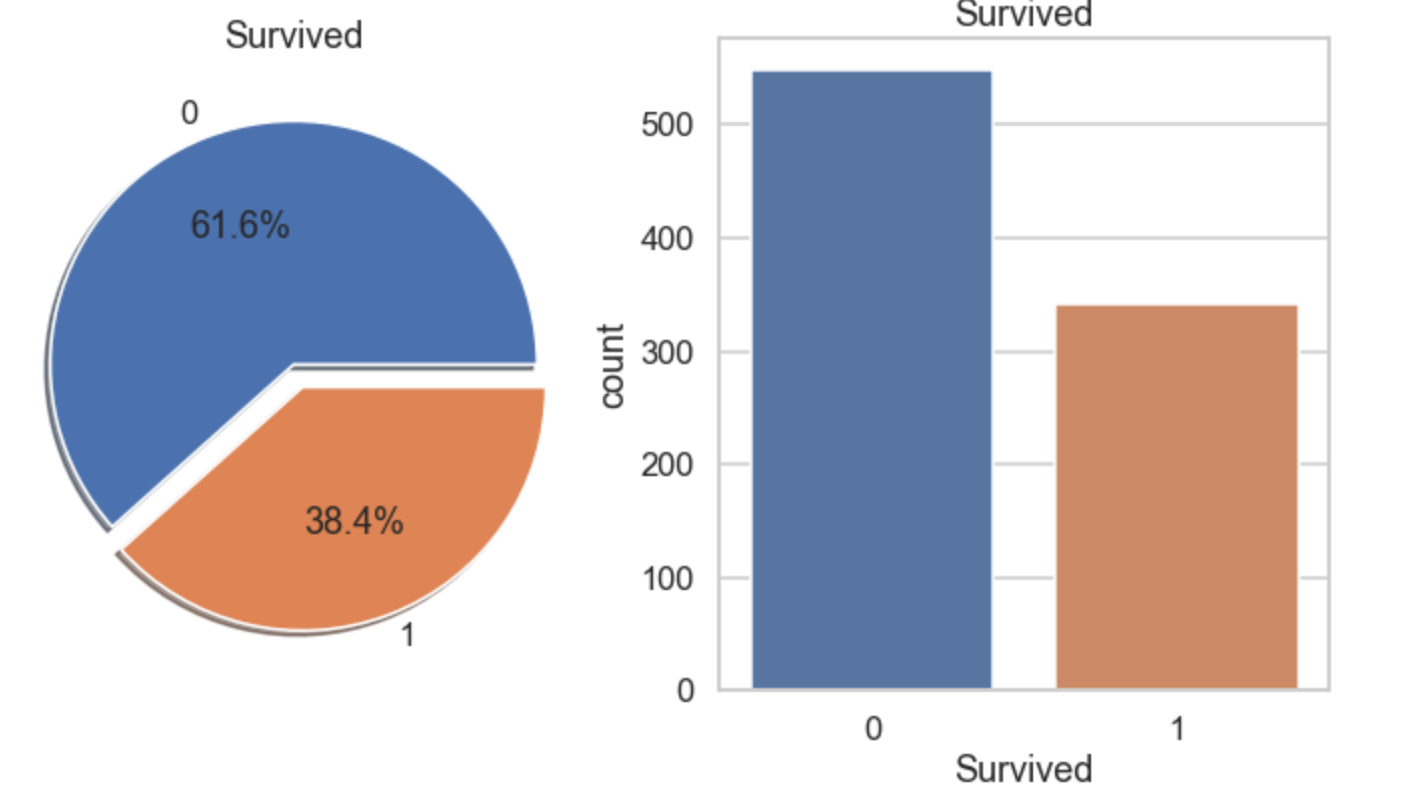


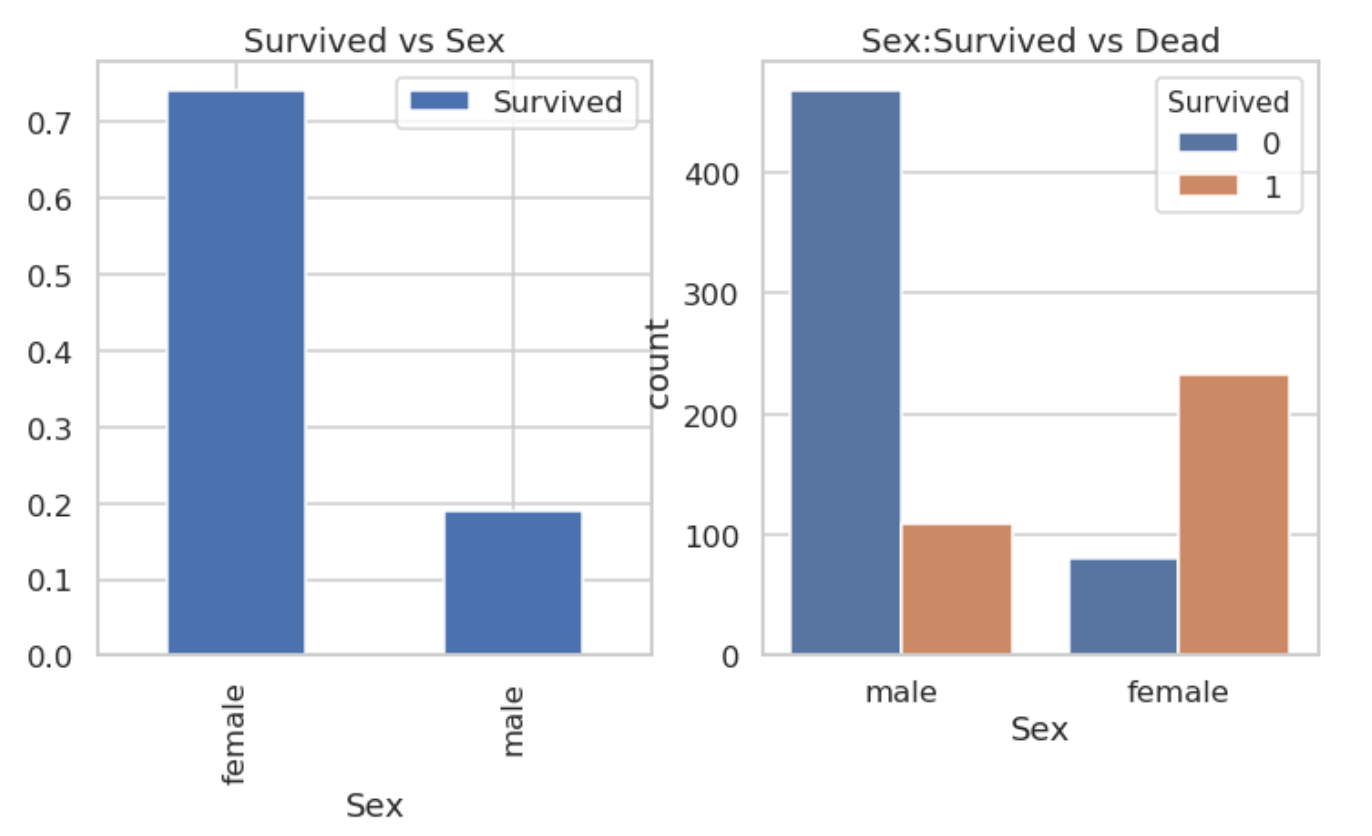

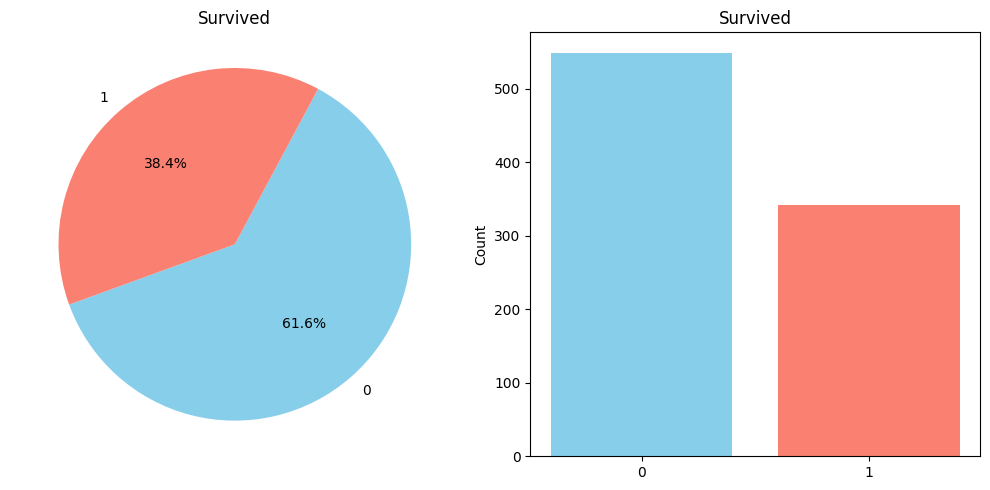

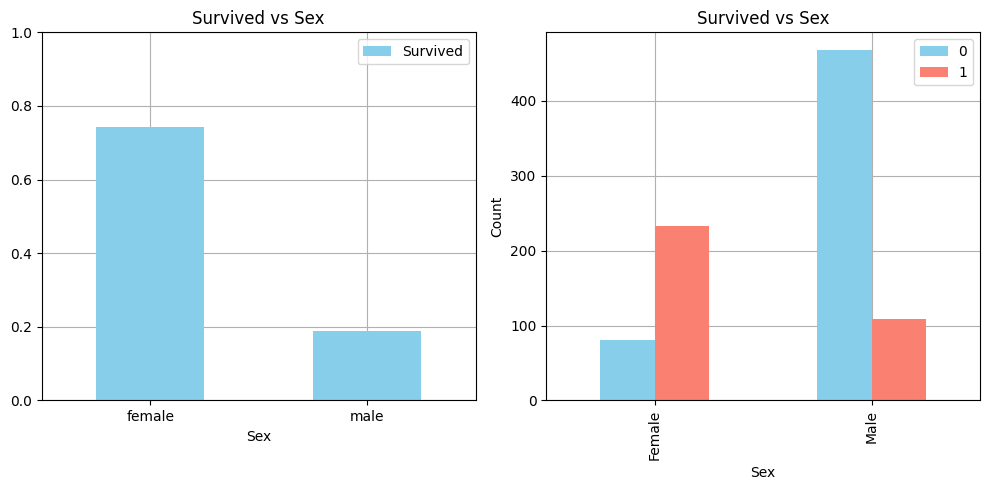

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('titanic.csv')


survival_counts = data['Survived'].value_counts()
total_passengers = survival_counts.sum()
survival_percentages = [survival_counts[0] / total_passengers * 100,
                        survival_counts[1] / total_passengers * 100]
labels = ['0', '1']


plt.figure(figsize=(10, 5))



plt.subplot(1, 2, 1)
plt.pie(survival_percentages, labels=labels, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=200)
plt.axis('equal')
plt.title('Survived')



plt.subplot(1, 2, 2)
plt.bar(labels, survival_counts, color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Survived')

plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('titanic.csv') 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

survival_by_gender = data.groupby('Sex')['Survived'].mean()
survival_by_gender.plot(kind='bar', color=['skyblue', 'skyblue'], ax=axes[0])
axes[0].grid(True, zorder=0) 
axes[0].set_axisbelow(True)
axes[0].set_xlabel('Sex')
axes[0].legend(['Survived'], loc='upper right')
axes[0].set_title('Survived vs Sex')
axes[0].set_ylim(0, 1)  
axes[0].tick_params(axis='x', rotation=0)  


survival_by_gender = data.groupby(['Sex', 'Survived']).size().unstack()
survival_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].grid(True, zorder=0)  
axes[1].set_axisbelow(True)
axes[1].set_xlabel('Sex')         
axes[1].set_ylabel('Count')        
axes[1].set_title('Survived vs Sex') 
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_yticks([0, 100, 200, 300, 400]) 
axes[1].legend(['0', '1'], loc='upper right')  


plt.tight_layout()
plt.show()



In [ ]:
# Графіки надають візуальне представлення виживання пасажирів Титаніка залежно від різних факторів. Наприклад, таких як стать, тощо....

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [7]:

missing_values = dataset.isnull().sum()
   

print(" Пропущені значення у кожній змінній:")
print(missing_values)


 Пропущені значення у кожній змінній:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [9]:

def most_common_female_name(filename):
    
    df = pd.read_csv(filename)
    female_names = df[(df['Sex'] == 'female') & (df['Name'].notnull())]['Name']
    female_names = female_names.str.split(',').str[1].str.split('.').str[1].str.strip()
    most_common_name = female_names.mode()[0]
    return most_common_name

most_common_name = most_common_female_name('titanic.csv')
print("Найпопулярніше жіноче ім'я на кораблі:", most_common_name)


Найпопулярніше жіноче ім'я на кораблі: Mary


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [10]:

def most_common_male_name(filename):
    
    df = pd.read_csv(filename)
    male_names = df[(df['Sex'] == 'male') & (df['Name'].notnull())]['Name']
    male_names = male_names.str.split(',').str[1].str.split('.').str[1].str.strip()
    most_common_name = male_names.mode()[0]
    return most_common_name

most_common_name = most_common_male_name('titanic.csv')
print("Найпопулярніше чоловіче ім'я на кораблі:", most_common_name)

Найпопулярніше чоловіче ім'я на кораблі: John


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
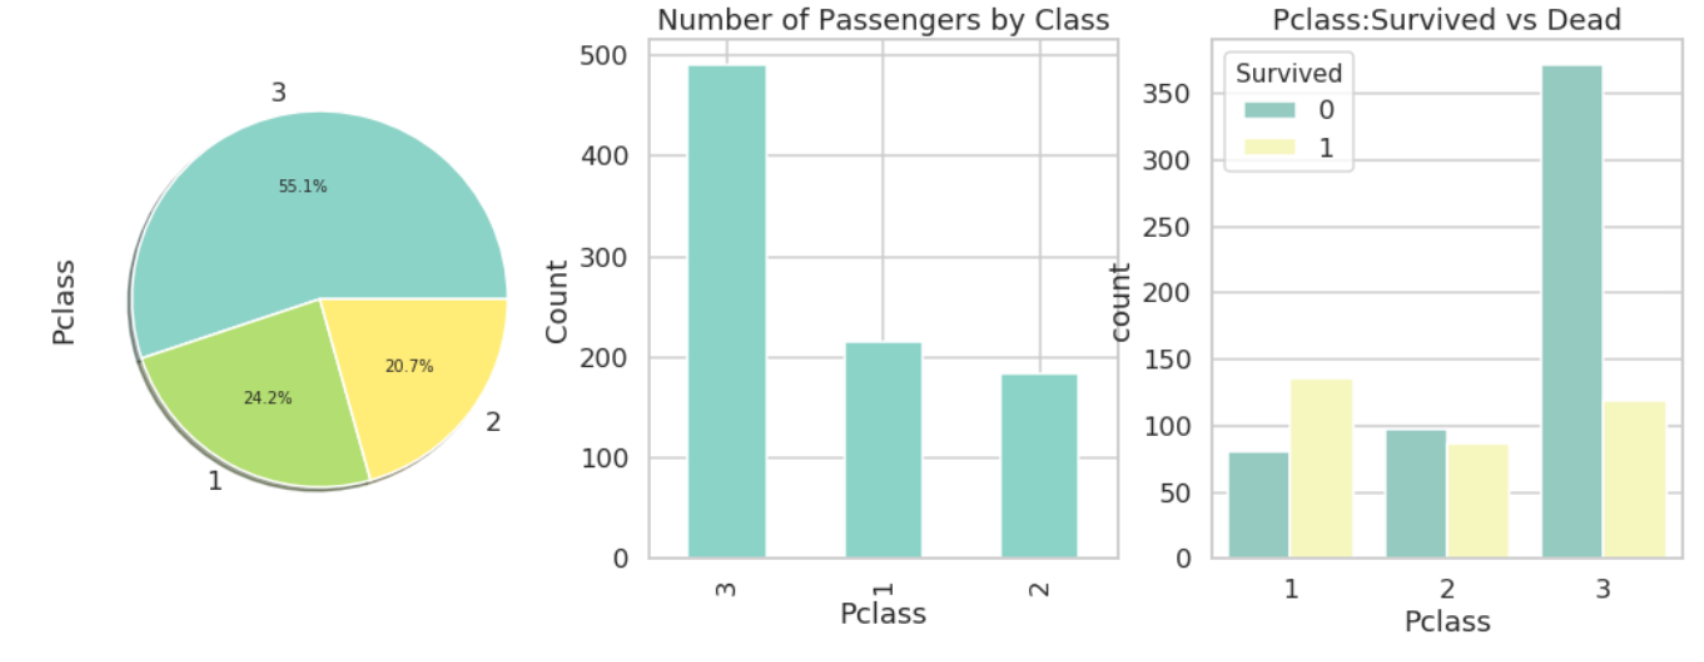

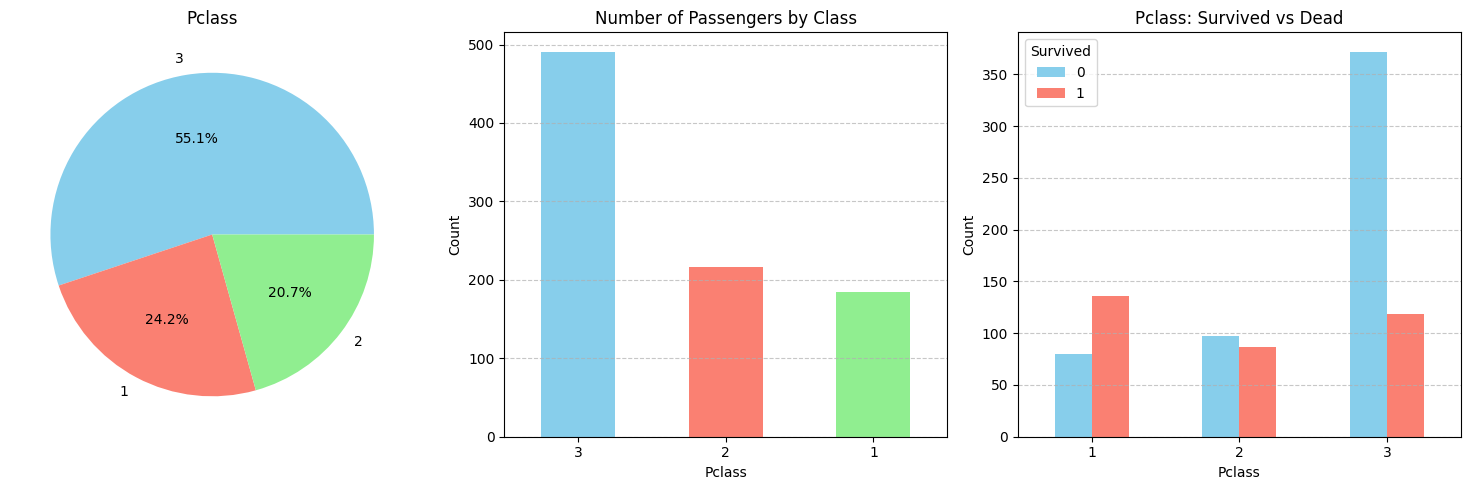

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('titanic.csv')

ticket_counts = data['Pclass'].value_counts()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ticket_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'], ax=axes[0])
axes[0].set_title('Pclass')
axes[0].set_ylabel('') 


ticket_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Passengers by Class')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['3', '2', '1'], rotation=0)
axes[1].set_yticks([0, 100, 200, 300, 400, 500])
axes[1].grid(axis='y', linestyle='--', alpha=0.7) 


survival_by_class = data.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[2])
axes[2].set_xlabel('Pclass')
axes[2].set_ylabel('Count')
axes[2].set_title('Pclass: Survived vs Dead')
axes[2].set_xticks([0, 1, 2])
axes[2].set_xticklabels(['1', '2', '3'], rotation=0)
axes[2].set_yticks([0, 50, 100, 150, 200, 250, 300, 350])
axes[2].grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()
plt.show()








In [ ]:
# В цих графіках ми визначили, скільки людей в певному класі, також співвідношення виживших та загиблих в одному класі

Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
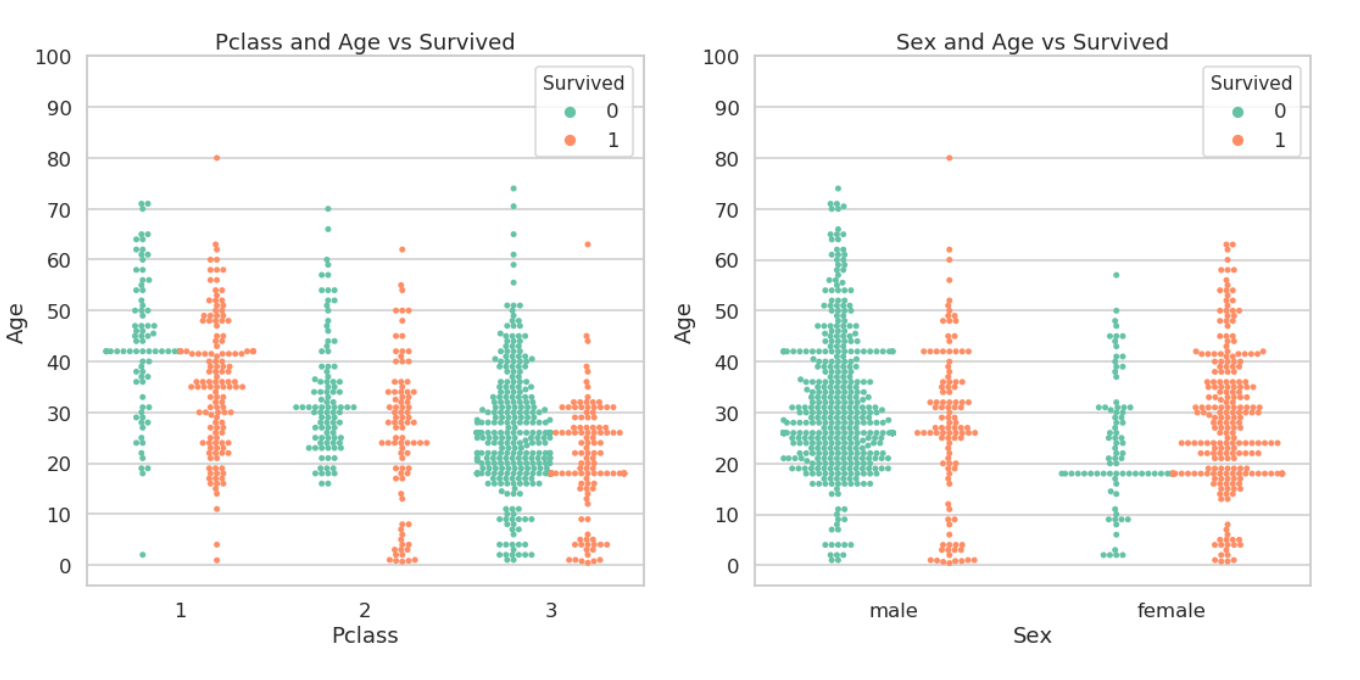![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

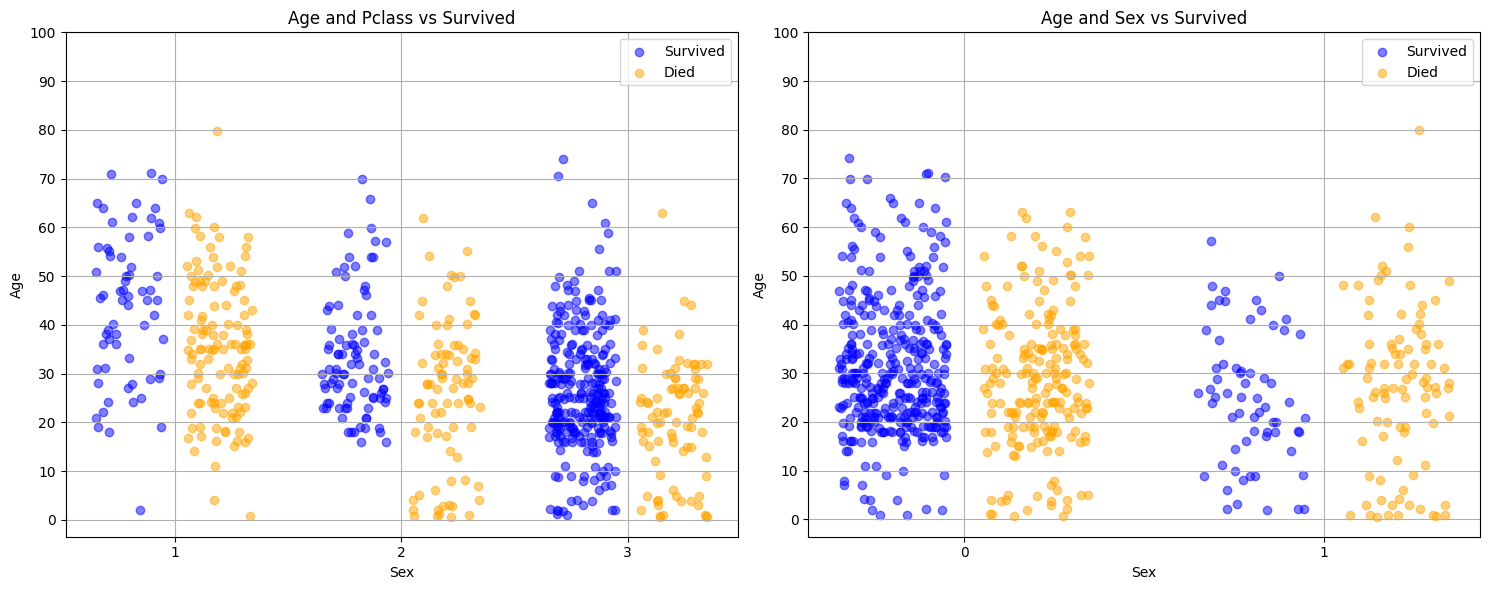

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def jitter(data, factor=0.15):
    return np.random.uniform(-factor, factor, size=len(data))

def plot_scatter(ax, x, y, color, label, title, xticks=None, yticks=None):
    ax.scatter(x, y, color=color, label=label, alpha=0.5)
    ax.set_xlabel('Pclass' if xticks is None else 'Sex')
    ax.set_ylabel('Age')
    ax.set_title(title)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()
    ax.grid(True)

data = pd.read_csv('titanic.csv')

figure, axes = plt.subplots(1, 2, figsize=(15, 6))

g_x_pclass = data[data['Survived'] == 0]['Pclass'] - 0.2 + jitter(data[data['Survived'] == 0]['Pclass'])
g_y_pclass = data[data['Survived'] == 0]['Age'] + jitter(data[data['Survived'] == 0]['Age'])

o_x_pclass = data[data['Survived'] == 1]['Pclass'] + 0.2 + jitter(data[data['Survived'] == 1]['Pclass'])
o_y_pclass = data[data['Survived'] == 1]['Age'] + jitter(data[data['Survived'] == 1]['Age'])

plot_scatter(axes[0], g_x_pclass,g_y_pclass, 'blue', 'Survived', 'Age and Pclass vs Survived', [1, 2, 3], range(0, 101, 10))
plot_scatter(axes[0], o_x_pclass, o_y_pclass, 'orange', 'Died', 'Age and Pclass vs Survived', [1, 2, 3], range(0, 101, 10))
g_x_sex = np.where(data[data['Survived'] == 0]['Sex'] == "male", 0, 1) - 0.2 + jitter(data[data['Survived'] == 0]['Sex'])
g_y_sex = data[data['Survived'] == 0]['Age'] + jitter(data[data['Survived'] == 0]['Age'])
o_x_sex = np.where(data[data['Survived'] == 1]['Sex'] == "female", 0, 1) + 0.2 + jitter(data[data['Survived'] == 1]['Sex'])
o_y_sex = data[data['Survived'] == 1]['Age'] + jitter(data[data['Survived'] == 1]['Age'])

plot_scatter(axes[1], g_x_sex, g_y_sex, 'blue', 'Survived', 'Age and Sex vs Survived', [0, 1], range(0, 101, 10))
plot_scatter(axes[1], o_x_sex, o_y_sex, 'orange', 'Died', 'Age and Sex vs Survived', [0, 1], range(0, 101, 10))

plt.tight_layout()
plt.show()





In [ ]:
# На цих графіках точки позначають пасажирів, виживші пасажири позначені синіми точками, а загиблі - помаранчевими.

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

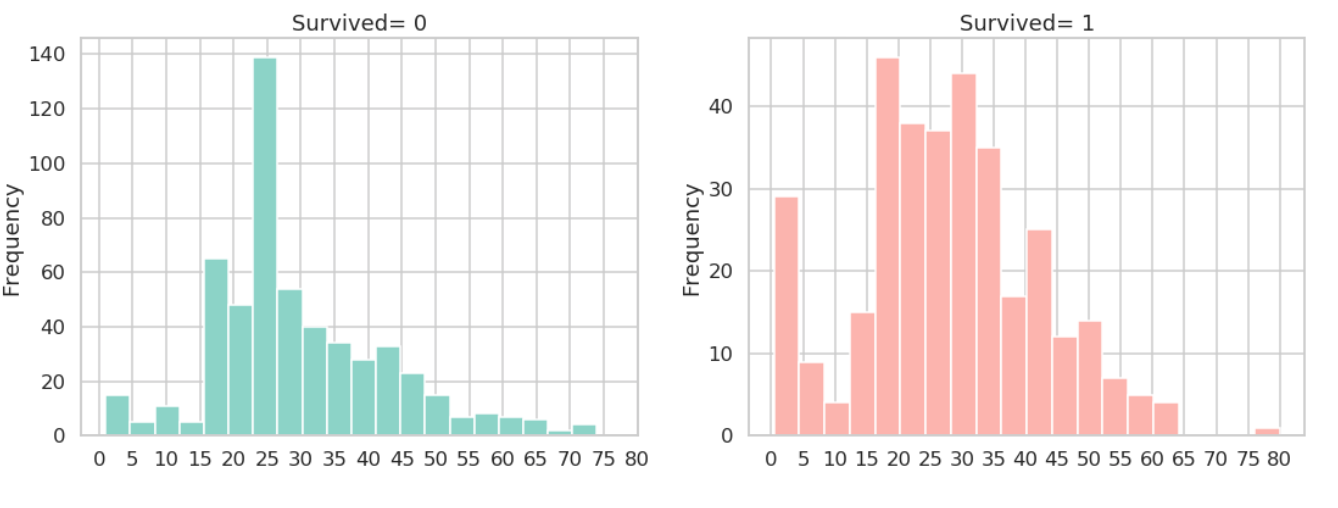



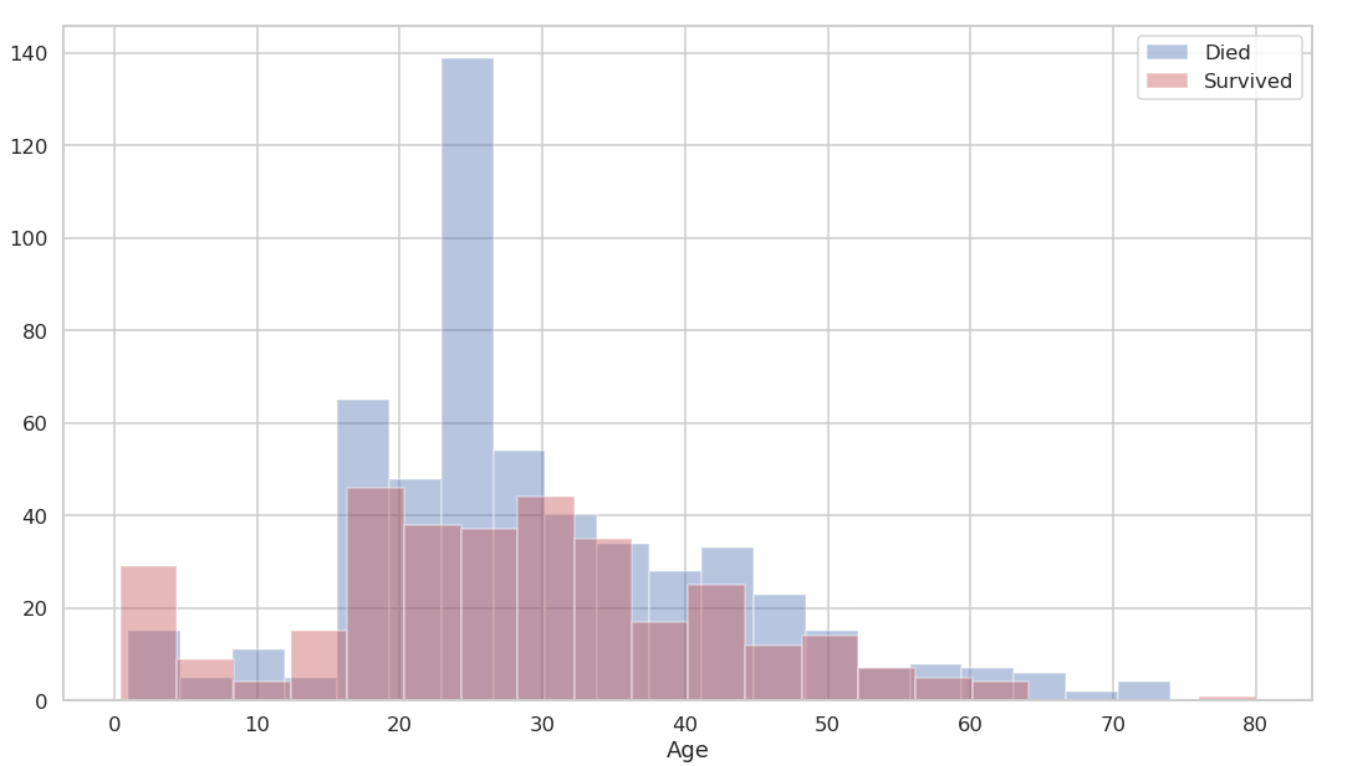

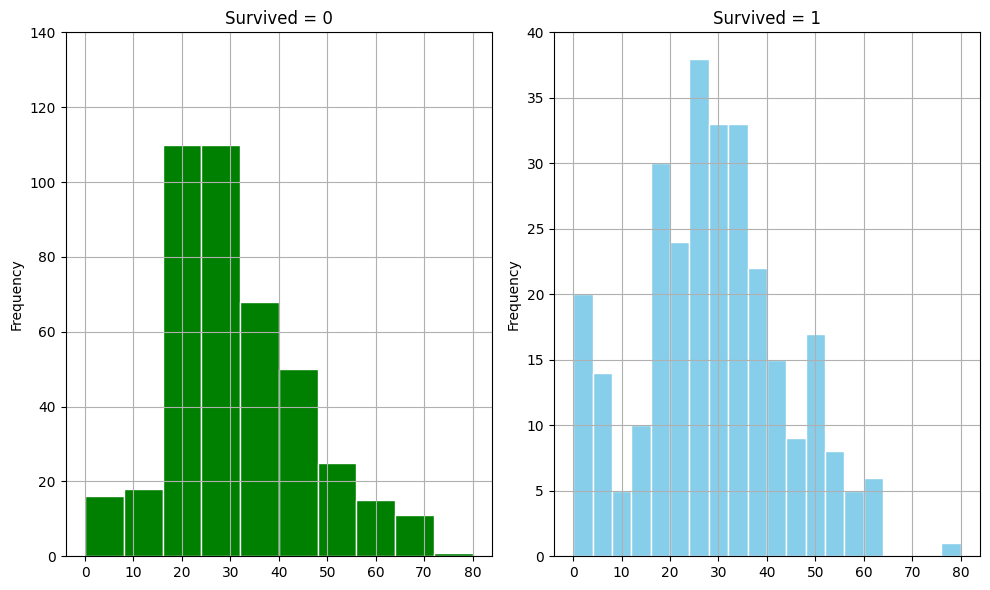

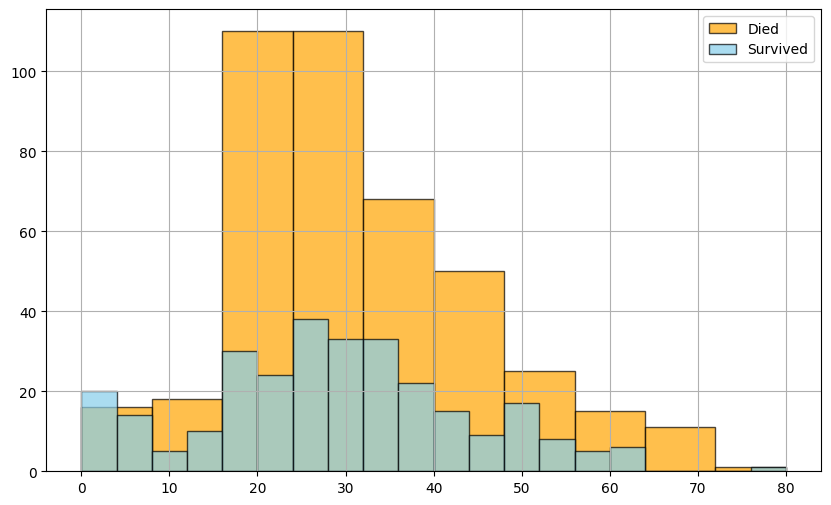

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv') 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(data[data['Survived'] == 0]['Age'], bins=10, range=(0, 80), color='green', edgecolor='white')
plt.ylabel('Frequency')
plt.title('Survived = 0')
plt.ylim(0, 140)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data[data['Survived'] == 1]['Age'], bins=20, range=(0, 80), color='skyblue', edgecolor='white')
plt.ylabel('Frequency')
plt.title('Survived = 1')
plt.ylim(0, 40)
plt.grid(True)

plt.tight_layout()
plt.show()


#2
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')  

plt.figure(figsize=(10, 6))

plt.hist(data[data['Survived'] == 0]['Age'], bins=10, range=(0, 80), color='orange', edgecolor='black', alpha=0.7, label='Died')
plt.hist(data[data['Survived'] == 1]['Age'], bins=20, range=(0, 80), color='skyblue', edgecolor='black', alpha=0.7, label='Survived')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Я вважаю, що побудовані гістограми можуть дати хоч якесь уявлення, але для точного розуміння треба аналіз та статистичні оцінки

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
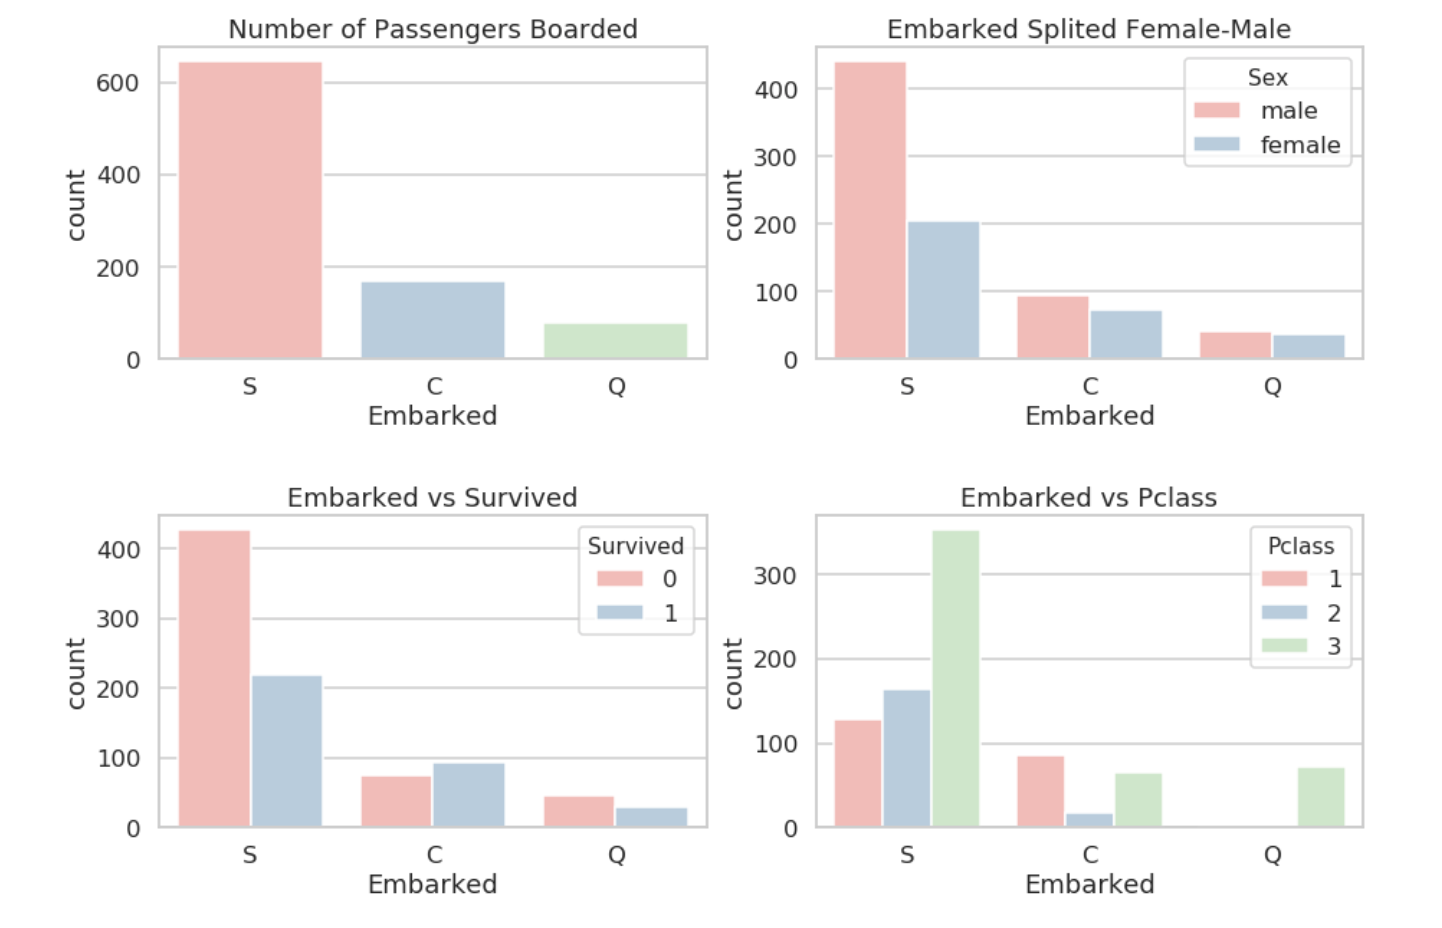

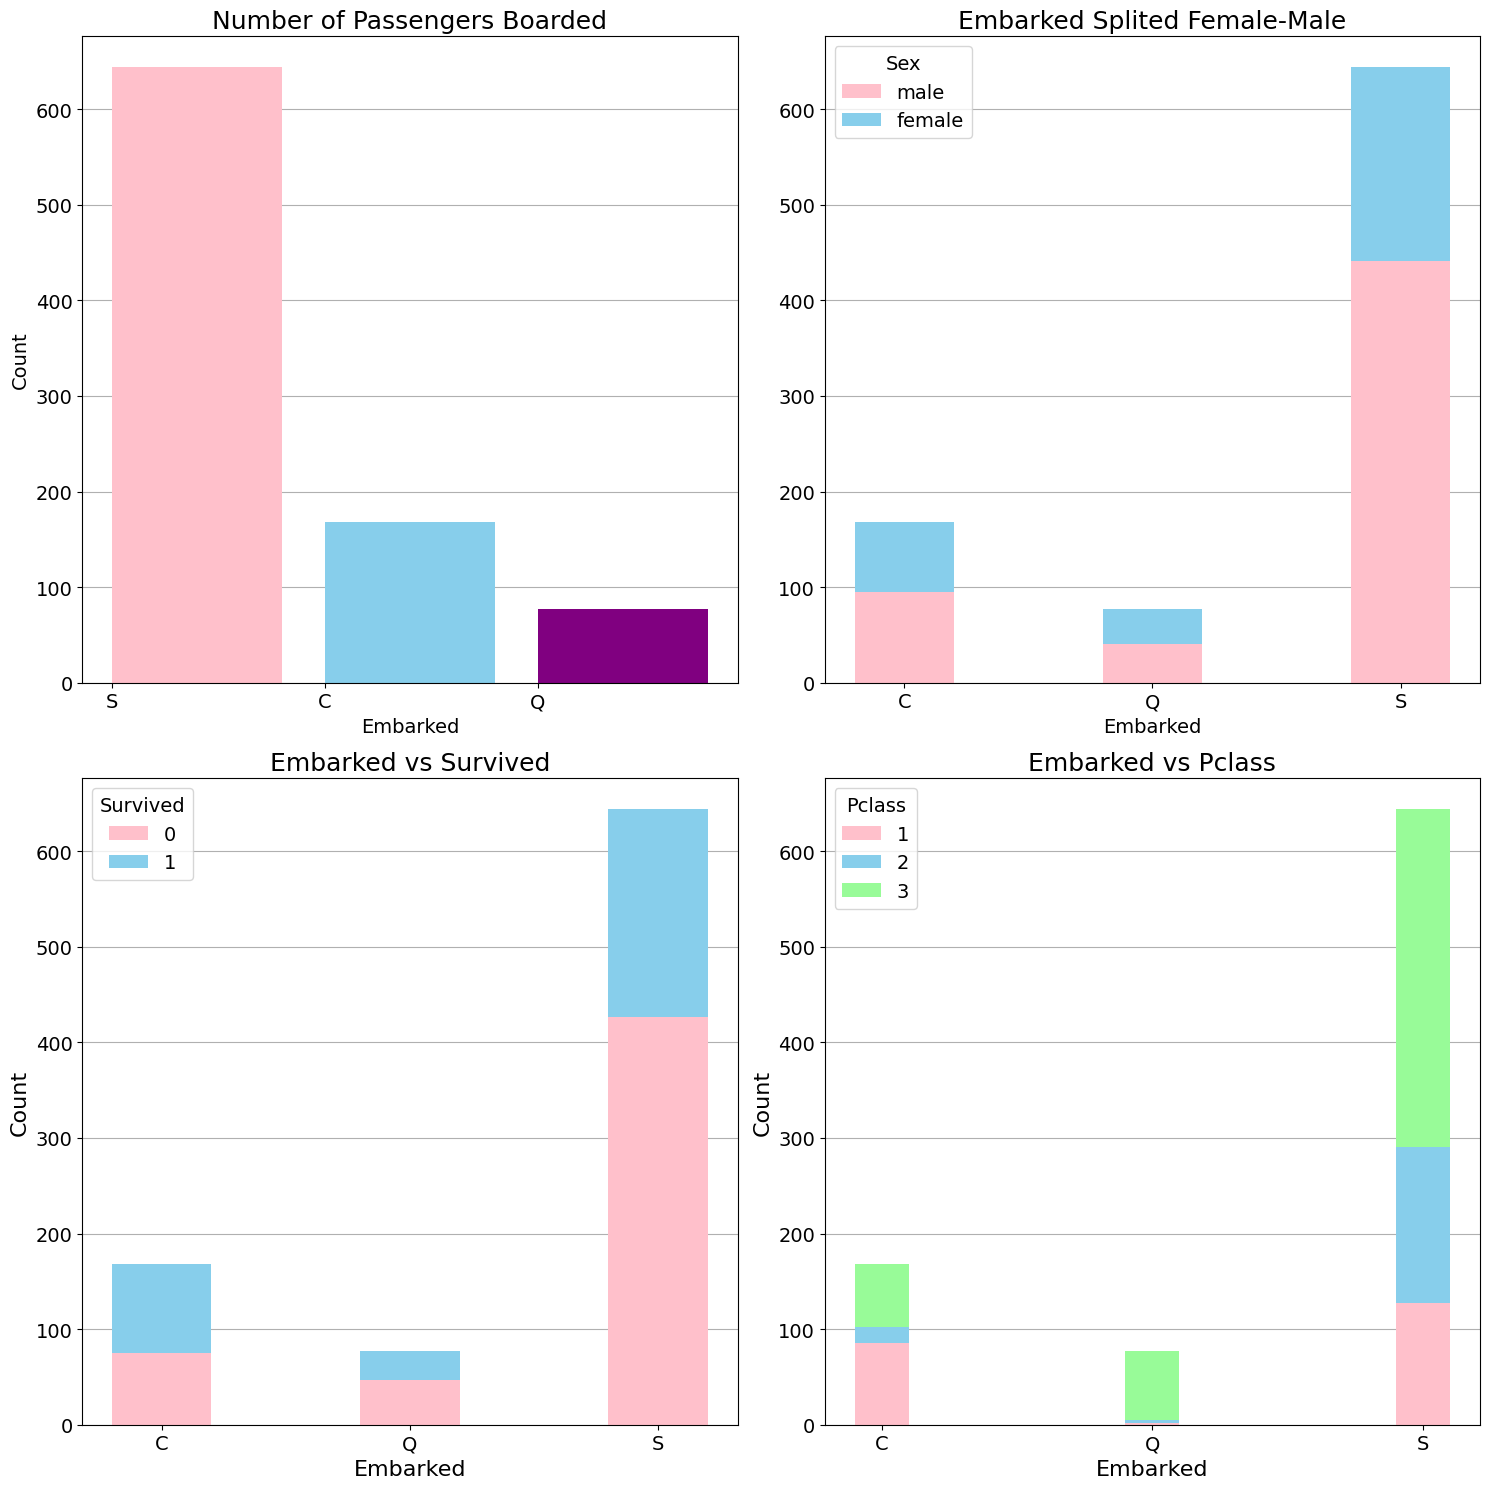

In [55]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

embarked_counts = data["Embarked"].value_counts()
embarked_survived = data.groupby("Embarked")["Survived"].value_counts().unstack().fillna(0)
embarked_pclass = data.groupby("Embarked")["Pclass"].value_counts().unstack().fillna(0)
embarked_sex = data.groupby("Embarked")["Sex"].value_counts().unstack().fillna(0)

ax[0, 0].bar(embarked_counts.index, embarked_counts.values, width=0.8, color=["pink", "skyblue", "purple"], align='edge')
ax[0, 0].set_title("Number of Passengers Boarded", size=18)
ax[0, 0].set_xlabel("Embarked", size=14)
ax[0, 0].set_ylabel("Count", size=14)
ax[0, 0].tick_params(labelsize=14)
ax[0, 0].grid(axis="y")
ax[0, 0].set_axisbelow(True)

embarked_sex_counts = data.groupby(["Embarked", "Sex"])["PassengerId"].count().unstack().fillna(0)
ax[0, 1].bar(embarked_sex_counts.index, embarked_sex_counts["male"], width=0.4, color="pink")
ax[0, 1].bar(embarked_sex_counts.index, embarked_sex_counts["female"], width=0.4, bottom=embarked_sex_counts["male"], color="skyblue")
ax[0, 1].set_title("Embarked Splited Female-Male", size=18)
ax[0, 1].set_xlabel("Embarked", size=14)
ax[0, 1].tick_params(labelsize=14)
ax[0, 1].legend(["male", "female"], title="Sex", fontsize=14, title_fontsize=14)
ax[0, 1].grid(axis="y")
ax[0, 1].set_axisbelow(True)

embarked_survived_counts = data.groupby(["Embarked", "Survived"])["PassengerId"].count().unstack().fillna(0)
ax[1, 0].bar(embarked_survived_counts.index, embarked_survived_counts[0], width=0.4, color="pink")
ax[1, 0].bar(embarked_survived_counts.index, embarked_survived_counts[1], width=0.4, bottom=embarked_survived_counts[0], color="skyblue")
ax[1, 0].set_title("Embarked vs Survived", size=18)
ax[1, 0].set_ylabel("Count", size=16)
ax[1, 0].set_xlabel("Embarked", size=16)
ax[1, 0].tick_params(labelsize=14)
ax[1, 0].legend(["0", "1"], title="Survived", fontsize=14, title_fontsize=14)
ax[1, 0].grid(axis="y")
ax[1, 0].set_axisbelow(True)

embarked_pclass_counts = data.groupby(["Embarked", "Pclass"])["PassengerId"].count().unstack().fillna(0)
ax[1, 1].bar(embarked_pclass_counts.index, embarked_pclass_counts[1], width=0.2, color="pink")
ax[1, 1].bar(embarked_pclass_counts.index, embarked_pclass_counts[2], width=0.2, bottom=embarked_pclass_counts[1], color="skyblue")
ax[1, 1].bar(embarked_pclass_counts.index, embarked_pclass_counts[3], width=0.2, bottom=embarked_pclass_counts[1]+embarked_pclass_counts[2], color="palegreen")
ax[1, 1].set_title("Embarked vs Pclass", size=18)
ax[1, 1].set_ylabel("Count", size=16)
ax[1, 1].set_xlabel("Embarked", size=16)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].legend(["1", "2", "3"], title="Pclass", fontsize=14, title_fontsize=14)
ax[1, 1].grid(axis="y")
ax[1, 1].set_axisbelow(True)

plt.tight_layout()
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

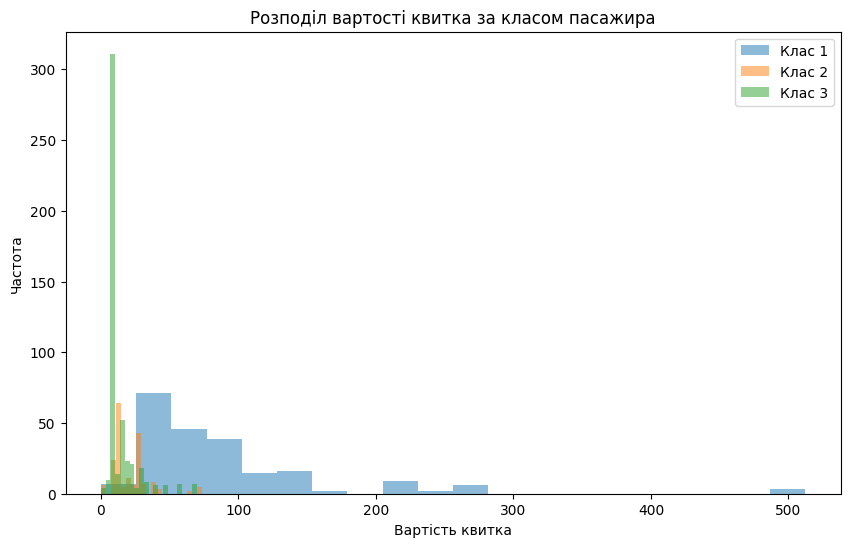

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ticket_fare_distribution(filename):
    df = pd.read_csv(filename)
    plt.figure(figsize=(10, 6))
    for pclass in sorted(df['Pclass'].unique()):
        df_class = df[df['Pclass'] == pclass]
        plt.hist(df_class['Fare'], bins=20, alpha=0.5, label=f'Клас {pclass}')
    plt.xlabel('Вартість квитка')
    plt.ylabel('Частота')
    plt.title('Розподіл вартості квитка за класом пасажира')
    plt.legend()
    plt.show()

filename = 'titanic.csv'
plot_ticket_fare_distribution(filename)


In [ ]:
# За діаграмою ми можемр зрозуміти, що найбільший попит був на квиток 3 класу,адже він був дешевший

Прокоментуйте побудовані графіки